In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import pandas as pd

In [2]:
dataset = pd.read_csv('Data/dataset_spine_clean.csv')

In [3]:
dataset.columns

Index(['Unnamed: 0', 'pelvic_incidence', 'pelvic tilt',
       'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius',
       'degree_spondylolisthesis', 'pelvic_slop', 'Direct_tilt',
       'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope',
       'label', 'label_val'],
      dtype='object')

Building our train and test datasets

In [4]:
X = pd.DataFrame(
        dataset.drop(axis=1, labels=['label', 'label_val']),
        columns=dataset.columns[:-2])

In [5]:
y = dataset.label_val

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=1)

We split our data in $\approx 33\%$ for validation and $\approx 66\%$ for training

In [7]:
len(X_test) / len(X_train)

0.33620689655172414

In [36]:
def test_model(model):
    plt.plot(model.loss_curve_)
    plt.grid()
    plt.show()

    y_pred = model.predict(X_test)

    confMatrix = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(
        pd.DataFrame(confMatrix),
        annot=True
    )
    plt.title("Confusion Matrix")
    plt.ylabel("Right Label")
    plt.xlabel("Predicted Label")

    return {'Score': model.score(X_test, y_test), 'Params': model.get_params()}
    

### Base model used for our testing

## First Model
- **activation function**: relu
- **solver for weight optimization:** Adam
- **L2 penalty for regularization**: 0.0001
- **Batch_size**: min(200,n_samples)
- **hidden layers sizes**: (100,)
- **Number of layers**: 3
- **learning rate**: constant equal to 0.001
- **epochs** = 30

Iteration 1, loss = 3.15757097
Iteration 2, loss = 1.28529423
Iteration 3, loss = 1.05462438
Iteration 4, loss = 0.49655784
Iteration 5, loss = 0.49332250
Iteration 6, loss = 0.51035197
Iteration 7, loss = 0.34932612
Iteration 8, loss = 0.19186984
Iteration 9, loss = 0.13699492
Iteration 10, loss = 0.13840442
Iteration 11, loss = 0.12908075
Iteration 12, loss = 0.10141425
Iteration 13, loss = 0.07866260
Iteration 14, loss = 0.07066033
Iteration 15, loss = 0.06856962
Iteration 16, loss = 0.06867723
Iteration 17, loss = 0.06571432
Iteration 18, loss = 0.05955718
Iteration 19, loss = 0.05438876
Iteration 20, loss = 0.04970770
Iteration 21, loss = 0.04710825
Iteration 22, loss = 0.04507265
Iteration 23, loss = 0.04327227
Iteration 24, loss = 0.04166162
Iteration 25, loss = 0.04028208
Iteration 26, loss = 0.03886659
Iteration 27, loss = 0.03797491
Iteration 28, loss = 0.03641007
Iteration 29, loss = 0.03512798
Iteration 30, loss = 0.03482672


/home/gbrls/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


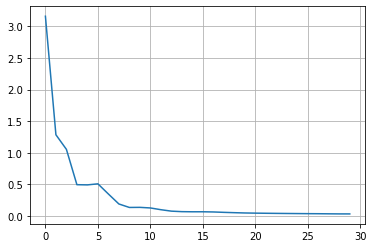

{'Score': 0.9871794871794872,
 'Params': {'activation': 'relu',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (100,),
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_fun': 15000,
  'max_iter': 30,
  'momentum': 0.9,
  'n_iter_no_change': 10,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': 1,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': True,
  'warm_start': False}}

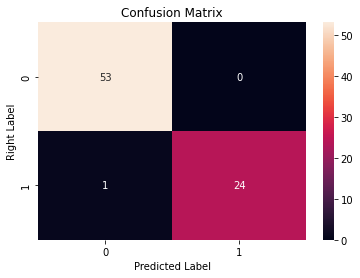

In [79]:
model1 = MLPClassifier(random_state=1, max_iter=30,verbose=True).fit(X_train, y_train)
test_model(model1)


### In the second model we experimented with the network's topology

## Second Model
- **activation function**: relu
- **solver for weight optimization:** Adam
- **L2 penalty for regularization**: 0.0001
- **Batch_size**: min(200,n_samples)
- **hidden layers sizes**: (12,)
- **Number of layers**: 3
- **learning rate**: constant equal to 0.001
- **epochs** = 30

### Results
Compared to the previous model, this network performed badly, we think this is because we need larger hidden layers.

Iteration 1, loss = 6.34931130
Iteration 2, loss = 5.64703312
Iteration 3, loss = 4.93211482
Iteration 4, loss = 4.25368756
Iteration 5, loss = 3.56801277
Iteration 6, loss = 2.97033311
Iteration 7, loss = 2.39296922
Iteration 8, loss = 1.95163163
Iteration 9, loss = 1.59617903
Iteration 10, loss = 1.36035362
Iteration 11, loss = 1.21027427
Iteration 12, loss = 1.12840140
Iteration 13, loss = 1.11055286
Iteration 14, loss = 1.09367007
Iteration 15, loss = 1.08191149
Iteration 16, loss = 1.06312474
Iteration 17, loss = 1.02999485
Iteration 18, loss = 0.98545489
Iteration 19, loss = 0.93620961
Iteration 20, loss = 0.89113585
Iteration 21, loss = 0.85048282
Iteration 22, loss = 0.81268860
Iteration 23, loss = 0.78159217
Iteration 24, loss = 0.76209748
Iteration 25, loss = 0.74126263
Iteration 26, loss = 0.72297646
Iteration 27, loss = 0.70724793
Iteration 28, loss = 0.69105689
Iteration 29, loss = 0.67397656
Iteration 30, loss = 0.65623891


/home/gbrls/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


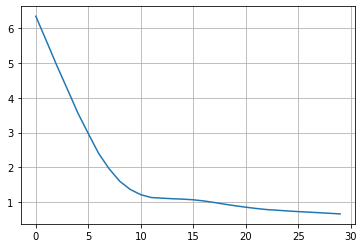

{'Score': 0.8846153846153846,
 'Params': {'activation': 'relu',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (12,),
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_fun': 15000,
  'max_iter': 30,
  'momentum': 0.9,
  'n_iter_no_change': 10,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': 1,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': True,
  'warm_start': False}}

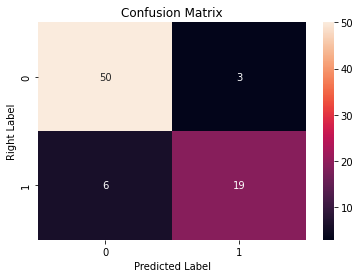

In [73]:
model2 = MLPClassifier(random_state=1, max_iter=30,verbose=True, hidden_layer_sizes=(12,)).fit(X_train, y_train)
test_model(model2)

### In this third model we added more hidden layers

## Third Model
- **activation function**: relu
- **solver for weight optimization:** Adam
- **L2 penalty for regularization**: 0.0001
- **Batch_size**: min(200,n_samples)
- **hidden layers sizes**: (12,5)
- **Number of layers**: 3
- **learning rate**: constant equal to 0.001
- **epochs** = 30

### Results
It's possible to see that increasing the number of hidden layers yielded a better performance for the network. We need more epochs to fully train this network.

Iteration 1, loss = 7.20418251
Iteration 2, loss = 6.20968118
Iteration 3, loss = 5.28737187
Iteration 4, loss = 4.32572793
Iteration 5, loss = 3.44071301
Iteration 6, loss = 2.63013777
Iteration 7, loss = 1.88320765
Iteration 8, loss = 1.26358412
Iteration 9, loss = 0.85932352
Iteration 10, loss = 0.55480063
Iteration 11, loss = 0.39627842
Iteration 12, loss = 0.31062858
Iteration 13, loss = 0.27937777
Iteration 14, loss = 0.26245421
Iteration 15, loss = 0.25118887
Iteration 16, loss = 0.24585463
Iteration 17, loss = 0.24105282
Iteration 18, loss = 0.23719156
Iteration 19, loss = 0.23261687
Iteration 20, loss = 0.22731284
Iteration 21, loss = 0.21962402
Iteration 22, loss = 0.21209337
Iteration 23, loss = 0.20388550
Iteration 24, loss = 0.19640585
Iteration 25, loss = 0.19018576
Iteration 26, loss = 0.18541117
Iteration 27, loss = 0.18181913
Iteration 28, loss = 0.17829887
Iteration 29, loss = 0.17516063
Iteration 30, loss = 0.17261429


/home/gbrls/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


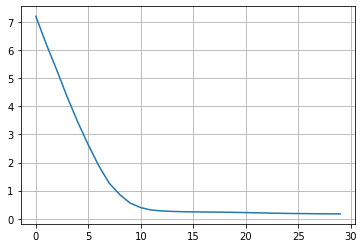

{'Score': 0.9230769230769231,
 'Params': {'activation': 'relu',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (12, 5),
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_fun': 15000,
  'max_iter': 30,
  'momentum': 0.9,
  'n_iter_no_change': 10,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': 1,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': True,
  'warm_start': False}}

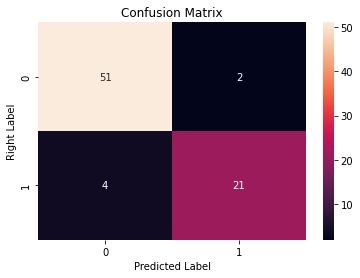

In [82]:
model3 = MLPClassifier(random_state=1, max_iter=30,verbose=True, hidden_layer_sizes=(12,5)).fit(X_train, y_train)
test_model(model3)

### In this forth model we changed the learning rate

## Forth Model
- **activation function**: relu
- **solver for weight optimization:** Adam
- **L2 penalty for regularization**: 0.0001
- **Batch_size**: min(200,n_samples)
- **hidden layers sizes**: (12, 5)
- **Number of layers**: 3
- **learning rate**: constant equal to 0.2
- **epochs** = 30

# Results
It worsened the network's performance, but it converged with the same number of epochs.

Iteration 1, loss = 8.24515873
Iteration 2, loss = 2.23714380
Iteration 3, loss = 0.65257649
Iteration 4, loss = 0.65597041
Iteration 5, loss = 0.64679352
Iteration 6, loss = 0.63936865
Iteration 7, loss = 0.63405240
Iteration 8, loss = 0.63160711
Iteration 9, loss = 0.62919697
Iteration 10, loss = 0.63002717
Iteration 11, loss = 0.62995855
Iteration 12, loss = 0.63101498
Iteration 13, loss = 0.63113521
Iteration 14, loss = 0.63097423
Iteration 15, loss = 0.63052368
Iteration 16, loss = 0.63000206
Iteration 17, loss = 0.62951394
Iteration 18, loss = 0.62951580
Iteration 19, loss = 0.62939936
Iteration 20, loss = 0.62966468
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


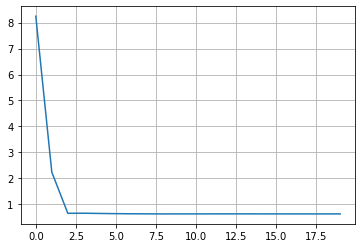

{'Score': 0.6794871794871795,
 'Params': {'activation': 'relu',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (12, 5),
  'learning_rate': 'constant',
  'learning_rate_init': 0.2,
  'max_fun': 15000,
  'max_iter': 30,
  'momentum': 0.9,
  'n_iter_no_change': 10,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': 1,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': True,
  'warm_start': False}}

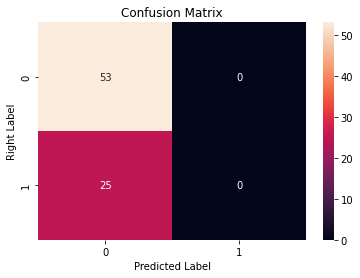

In [83]:
model4 = MLPClassifier(random_state=1, max_iter=30,verbose=True, hidden_layer_sizes=(12,5), learning_rate_init=0.2).fit(X_train, y_train)
test_model(model4)

### Here we increased the number of epohcs to fully train this network

## Fifth Model
- **activation function**: relu
- **solver for weight optimization:** Adam
- **L2 penalty for regularization**: 0.0001
- **Batch_size**: min(200,n_samples)
- **hidden layers sizes**: (200,)
- **Number of layers**: 3
- **learning rate**: constant equal to 0.001
- **epochs** = 300

### Results
The training eventually converged and it shows a good loss.

Iteration 1, loss = 7.20418251
Iteration 2, loss = 6.20968118
Iteration 3, loss = 5.28737187
Iteration 4, loss = 4.32572793
Iteration 5, loss = 3.44071301
Iteration 6, loss = 2.63013777
Iteration 7, loss = 1.88320765
Iteration 8, loss = 1.26358412
Iteration 9, loss = 0.85932352
Iteration 10, loss = 0.55480063
Iteration 11, loss = 0.39627842
Iteration 12, loss = 0.31062858
Iteration 13, loss = 0.27937777
Iteration 14, loss = 0.26245421
Iteration 15, loss = 0.25118887
Iteration 16, loss = 0.24585463
Iteration 17, loss = 0.24105282
Iteration 18, loss = 0.23719156
Iteration 19, loss = 0.23261687
Iteration 20, loss = 0.22731284
Iteration 21, loss = 0.21962402
Iteration 22, loss = 0.21209337
Iteration 23, loss = 0.20388550
Iteration 24, loss = 0.19640585
Iteration 25, loss = 0.19018576
Iteration 26, loss = 0.18541117
Iteration 27, loss = 0.18181913
Iteration 28, loss = 0.17829887
Iteration 29, loss = 0.17516063
Iteration 30, loss = 0.17261429
Iteration 31, loss = 0.17089726
Iteration 32, los

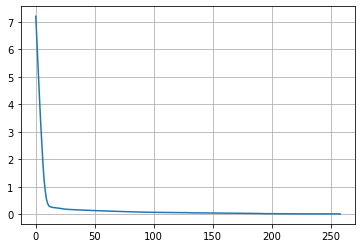

{'Score': 0.9871794871794872,
 'Params': {'activation': 'relu',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (12, 5),
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_fun': 15000,
  'max_iter': 300,
  'momentum': 0.9,
  'n_iter_no_change': 10,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': 1,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': True,
  'warm_start': False}}

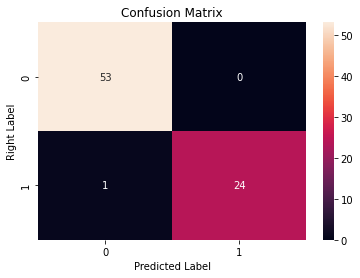

In [85]:
model5 = MLPClassifier(random_state=1, max_iter=300,verbose=True, hidden_layer_sizes=(12,5)).fit(X_train, y_train)
test_model(model5)

### In this model we increased the size of each hidden layers, but set the number of hidden layers back to the default value, and we changed the solver.

## Sixth Model
- **activation function**: relu
- **solver for weight optimization:** sgd
- **L2 penalty for regularization**: 0.0001
- **Batch_size**: min(200,n_samples)
- **hidden layers sizes**: (200,)
- **Number of layers**: 3
- **learning rate**: constant equal to 0.001
- **epochs** = 300

# Results
It showed a good loss with less epochs needed for training than the previous models with more hidden layers.

Iteration 1, loss = 8.19954150
Iteration 2, loss = 0.17928285
Iteration 3, loss = 0.48331912
Iteration 4, loss = 0.07094937
Iteration 5, loss = 0.08551008
Iteration 6, loss = 0.08982902
Iteration 7, loss = 0.07956817
Iteration 8, loss = 0.09273040
Iteration 9, loss = 0.08992711
Iteration 10, loss = 0.10576764
Iteration 11, loss = 0.10139265
Iteration 12, loss = 0.14406034
Iteration 13, loss = 0.18219396
Iteration 14, loss = 0.07429198
Iteration 15, loss = 0.13765269
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


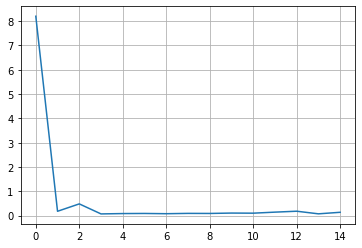

{'Score': 0.9871794871794872,
 'Params': {'activation': 'relu',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (200,),
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_fun': 15000,
  'max_iter': 300,
  'momentum': 0.9,
  'n_iter_no_change': 10,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': 1,
  'shuffle': True,
  'solver': 'sgd',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': True,
  'warm_start': False}}

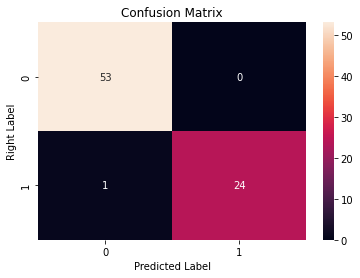

In [86]:
model6 = MLPClassifier(random_state=1, max_iter=300,verbose=True, hidden_layer_sizes=(200,), solver='sgd').fit(X_train, y_train)
test_model(model6)